# __Data Visualization__

## __INT Data__

In [15]:
import glob, numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

# Training files
files = glob.glob('../data/INT_data/INT_weather_set_parts_*')
files = sorted(files)
INT_parts = [pd.read_csv(file_path) for file_path in files]

# Concatenate the DataFrames into a single training set
INT_data = pd.concat(INT_parts, ignore_index=True)

/tmp/ipykernel_5064/3604653322.py:6: DtypeWarning: Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  WHT_parts = [pd.read_csv(file_path) for file_path in files]
/tmp/ipykernel_5064/3604653322.py:6: DtypeWarning: Columns (2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  WHT_parts = [pd.read_csv(file_path) for file_path in files]
/tmp/ipykernel_5064/3604653322.py:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  WHT_parts = [pd.read_csv(file_path) for file_path in files]
/tmp/ipykernel_5064/3604653322.py:6: DtypeWarning: Columns (1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  WHT_parts = [pd.read_csv(file_path) for file_path in files]
/tmp/ipykernel_5064/3604653322.py:6: DtypeWarning: Columns (2,5) have mixed types. Specify dtype option on import or set low_memory=False.
  WHT_parts = [pd.read_csv(file_path) for file_pa

In [16]:
INT_data['sampletime'] = pd.to_datetime(INT_data['sampletime'])

# Extract year
INT_data['year'] = INT_data['sampletime'].dt.year

# Extract month
INT_data['month'] = INT_data['sampletime'].dt.month

# Extract day
INT_data['day'] = INT_data['sampletime'].dt.day

# Extract hour
INT_data['hour'] = INT_data['sampletime'].dt.hour

# Extract minute
INT_data['minute'] = INT_data['sampletime'].dt.minute

# Extract second
INT_data['second'] = INT_data['sampletime'].dt.second

# Drop the 'sampletime' column
INT_data.drop(columns=['sampletime'], inplace=True)

INT_data.head()

,windspeed,airtemperature,relativehumidity,localwetness,localbattery,winddirection,airpressure,dewpoint,year,month,day,hour,minute,second
0,7.1742,9.3159,32.342,-0.025,11.995,NaN,NaN,NaN,2020,1,31,16,59,31
1,6.7829,9.322,32.324,-0.025,11.994,NaN,NaN,NaN,2020,1,31,16,59,37
2,7.0003,9.3159,32.36,-0.025,11.995,NaN,NaN,NaN,2020,1,31,16,59,43
3,7.2612,9.3159,32.434,-0.025,11.994,NaN,NaN,NaN,2020,1,31,16,59,49
4,6.9134,9.3159,32.489,-0.025,11.994,NaN,NaN,NaN,2020,1,31,16,59,55


In [22]:
# Convert the numeric values into float32
# We need to convert each category into float32
columns = INT_data.columns

# There are some missing values with '\\N' in the variables. Let's transform into an arbitrary number
for ii in columns[1:]:
    INT_data[ii][INT_data[ii] == '\\N'] = -1
    # Converting into float32
    INT_data[ii] = INT_data[ii].astype('float32')

# Converting wind speed to numeric
INT_data['windspeed'] = pd.to_numeric(INT_data['windspeed'], errors='coerce')

# Now we can count the number of NaNs in each category
print(INT_data.isna().sum())

/tmp/ipykernel_5064/3806321149.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WHT_data[ii][WHT_data[ii] == '\\N'] = -1
/tmp/ipykernel_5064/3806321149.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WHT_data[ii][WHT_data[ii] == '\\N'] = -1
/tmp/ipykernel_5064/3806321149.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WHT_data[ii][WHT_data[ii] == '\\N'] = -1
/tmp/ipykernel_5064/3806321149.py:7: SettingWithCopyWarning: 
A val

windspeed             15145
airtemperature            0
relativehumidity          0
localwetness        6334884
localbattery        6334884
winddirection       5557582
airpressure         5557582
dewpoint            5557582
year                      0
month                     0
day                       0
hour                      0
minute                    0
second                    0
dtype: int64


#### Mean temperature, humidity and wind speed by month

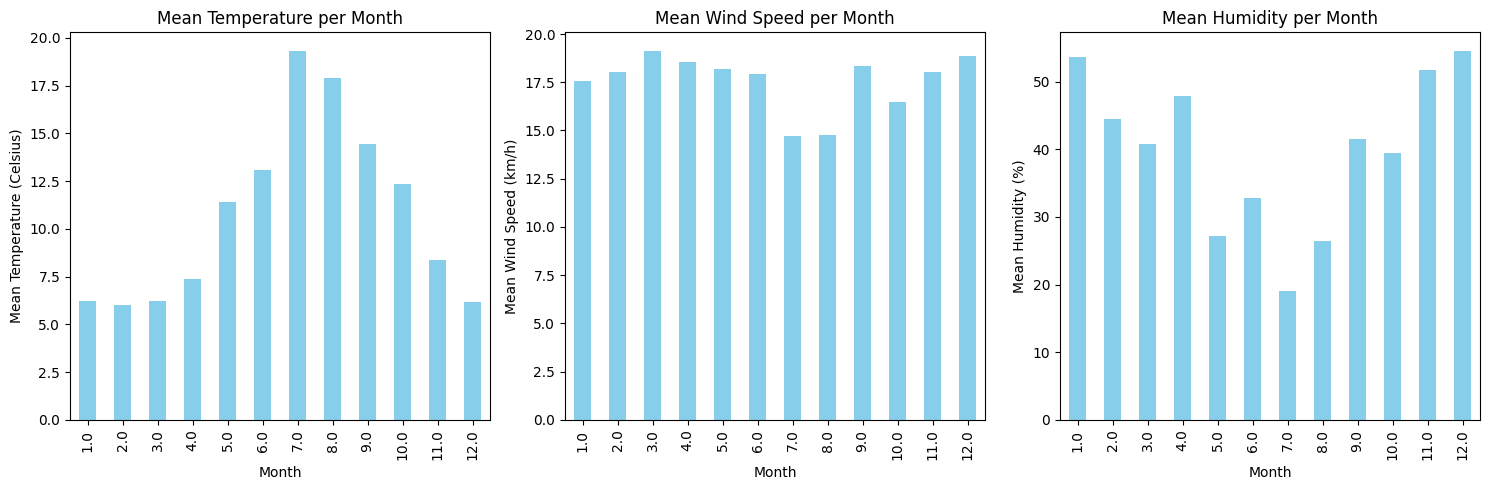

In [24]:
# Group by month and calculate mean temperature
mean_temp_per_month = INT_data.groupby('month')['airtemperature'].mean()
mean_wind_per_month = INT_data.groupby('month')['windspeed'].mean()
mean_humi_per_month = INT_data.groupby('month')['relativehumidity'].mean()

fig, ax = plt.subplots(1,3,figsize=(15,5))
ax = ax.ravel()

# Plotting the mean temperature per month
mean_temp_per_month.plot(kind='bar', color='skyblue', ax=ax[0])
mean_wind_per_month.plot(kind='bar', color='skyblue', ax=ax[1])
mean_humi_per_month.plot(kind='bar', color='skyblue', ax=ax[2])

ax[0].set_title('Mean Temperature per Month'); ax[1].set_title('Mean Wind Speed per Month'); ax[2].set_title('Mean Humidity per Month')
ax[0].set_xlabel('Month'); ax[1].set_xlabel('Month'); ax[2].set_xlabel('Month')
ax[0].set_ylabel('Mean Temperature (Celsius)'); ax[1].set_ylabel('Mean Wind Speed (km/h)'); ax[2].set_ylabel('Mean Humidity (%)')
#plt.xticks(rotation=45, ax=ax[0])  # Rotate x-axis labels for better readability
#ax[0].set_grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Mean temperature, humidity and wind speed by year

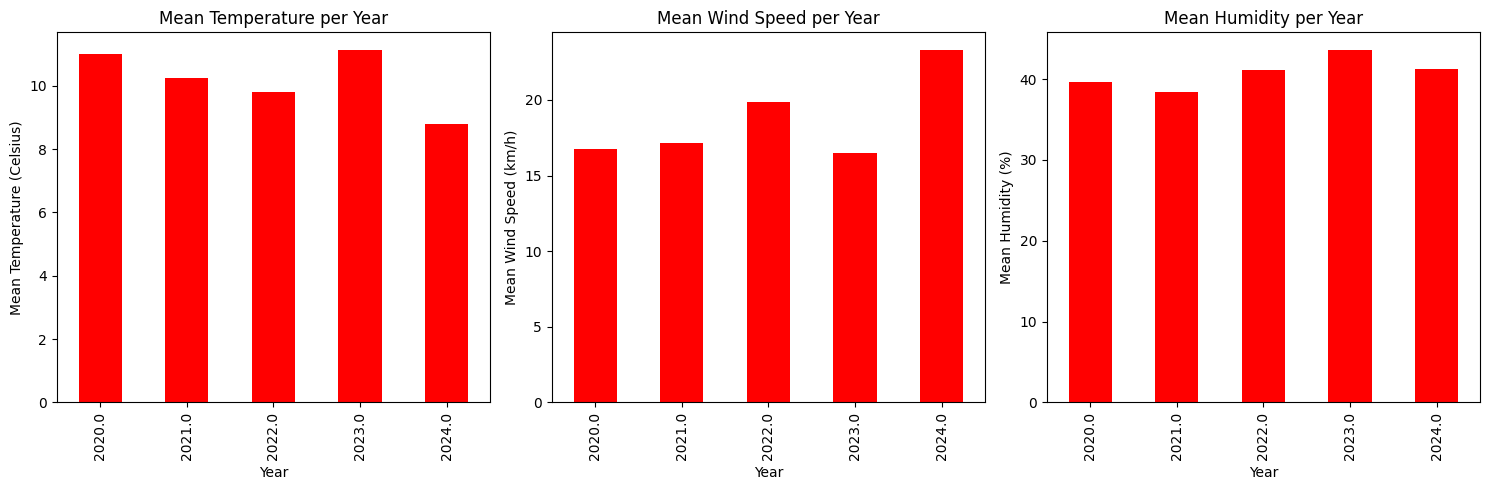

In [26]:
# Group by month and calculate mean temperature
mean_temp_per_year = INT_data.groupby('year')['airtemperature'].mean()
mean_wind_per_year = INT_data.groupby('year')['windspeed'].mean()
mean_humi_per_year = INT_data.groupby('year')['relativehumidity'].mean()

fig, ax = plt.subplots(1,3,figsize=(15,5))
ax = ax.ravel()

# Plotting the mean temperature per month
mean_temp_per_year.plot(kind='bar', color='red', ax=ax[0])
mean_wind_per_year.plot(kind='bar', color='red', ax=ax[1])
mean_humi_per_year.plot(kind='bar', color='red', ax=ax[2])

ax[0].set_title('Mean Temperature per Year'); ax[1].set_title('Mean Wind Speed per Year'); ax[2].set_title('Mean Humidity per Year')
ax[0].set_xlabel('Year'); ax[1].set_xlabel('Year'); ax[2].set_xlabel('Year')
ax[0].set_ylabel('Mean Temperature (Celsius)'); ax[1].set_ylabel('Mean Wind Speed (km/h)'); ax[2].set_ylabel('Mean Humidity (%)')
#plt.xticks(rotation=45, ax=ax[0])  # Rotate x-axis labels for better readability
#ax[0].set_grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## __Seeing__

In [27]:
seeing = pd.read_csv('../data/seeing_data.csv')
seeing.head()

,Date,Time,Seeing
0,2020-01-01,00:00:32,1.5096
1,2020-01-01,00:01:08,1.5786
2,2020-01-01,00:01:44,1.2777
3,2020-01-01,00:02:20,1.2360
4,2020-01-01,00:02:55,1.3859


In [28]:
# Converting to datetime
seeing['Date'] = pd.to_datetime(seeing['Date'])
seeing['Time'] = pd.to_datetime(seeing['Time'])

# Extract year
seeing['year'] = seeing['Date'].dt.year

# Extract month
seeing['month'] = seeing['Date'].dt.month

# Extract day
seeing['day'] = seeing['Date'].dt.day

# Extract hour
seeing['hour'] = seeing['Time'].dt.hour

# Extract minute
seeing['minute'] = seeing['Time'].dt.minute

# Extract second
seeing['second'] = seeing['Time'].dt.second

# Drop the 'sampletime' column
seeing.drop(columns=['Date', 'Time'], inplace=True)

seeing.head()

/tmp/ipykernel_5064/1782678562.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  seeing['Time'] = pd.to_datetime(seeing['Time'])


,Seeing,year,month,day,hour,minute,second
0,1.5096,2020,1,1,0,0,32
1,1.5786,2020,1,1,0,1,8
2,1.2777,2020,1,1,0,1,44
3,1.2360,2020,1,1,0,2,20
4,1.3859,2020,1,1,0,2,55


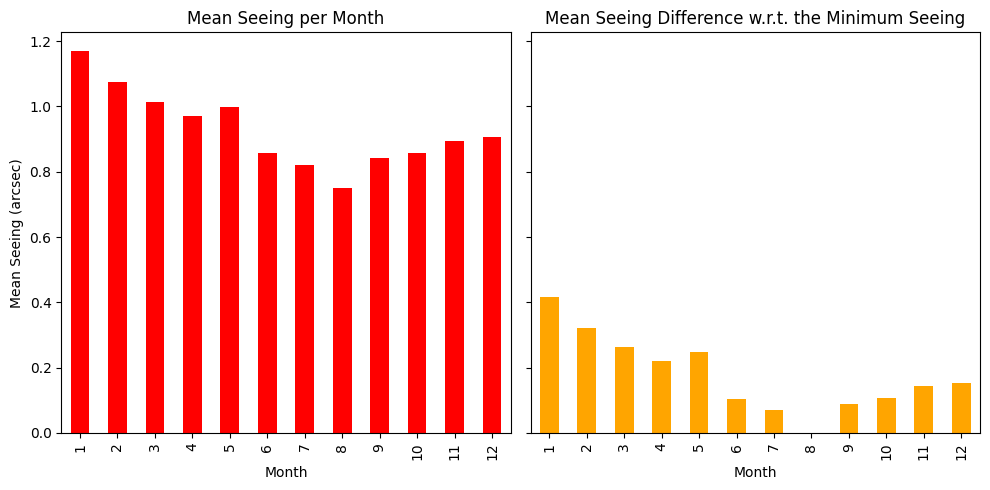

In [29]:
# Group by month and calculate mean temperature
mean_seeing_per_month = seeing.groupby('month')['Seeing'].mean()

fig, ax = plt.subplots(1,2,figsize=(10,5), sharey=True)
ax = ax.ravel()

# Plotting the mean temperature per month
mean_seeing_per_month.plot(kind='bar', color='red', ax=ax[0])
(mean_seeing_per_month - min(mean_seeing_per_month)).plot(kind='bar', color='orange', ax=ax[1])

ax[0].set_title('Mean Seeing per Month'); ax[1].set_title('Mean Seeing Difference w.r.t. the Minimum Seeing');
ax[0].set_xlabel('Month'); ax[1].set_xlabel('Month');
ax[0].set_ylabel('Mean Seeing (arcsec)'); #ax[1].set_ylabel('Mean Seeing (km/h)'); ax[2].set_ylabel('Mean Humidity (%)')
#plt.xticks(rotation=45, ax=ax[0])  # Rotate x-axis labels for better readability
#ax[0].set_grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [30]:
# Calculate the difference in seeing values per minute
seeing['seeing_diff'] = seeing['Seeing'].diff()

# Print the DataFrame to inspect the results
print(seeing)

# Calculate the mean absolute difference per minute
mean_diff_per_minute = seeing['seeing_diff'].abs().mean()

print("Mean absolute difference per minute:", mean_diff_per_minute)

        Seeing  year  month  day  hour  minute  second  seeing_diff
0       1.5096  2020      1    1     0       0      32          NaN
1       1.5786  2020      1    1     0       1       8       0.0690
2       1.2777  2020      1    1     0       1      44      -0.3009
3       1.2360  2020      1    1     0       2      20      -0.0417
4       1.3859  2020      1    1     0       2      55       0.1499
...        ...   ...    ...  ...   ...     ...     ...          ...
600839  1.2730  2024      2   20    23      57      17       0.0101
600840  0.9883  2024      2   20    23      57      52      -0.2847
600841  0.8413  2024      2   20    23      58      28      -0.1470
600842  0.8875  2024      2   20    23      59       3       0.0462
600843  0.9787  2024      2   20    23      59      39       0.0912

[600844 rows x 8 columns]
Mean absolute difference per minute: 0.1255427455327421


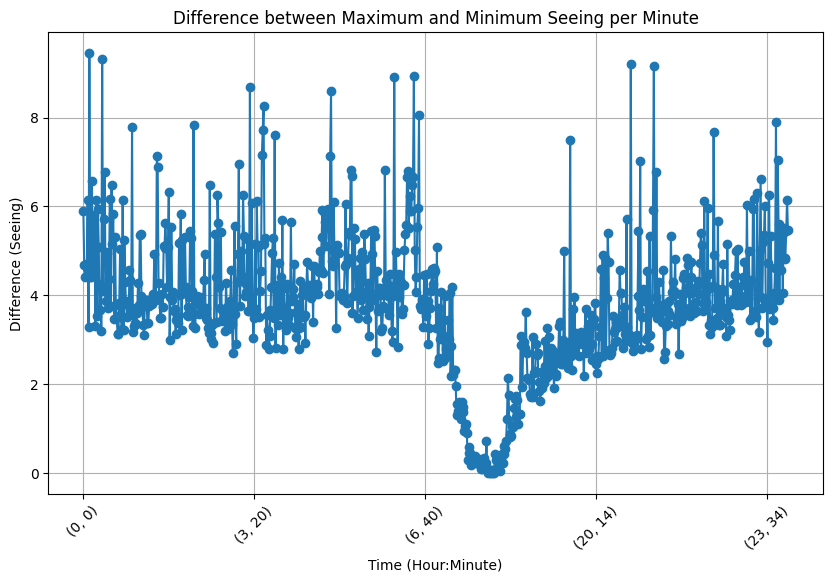

In [31]:
# Group by hour and minute and calculate the difference between max and min seeing values
minute_seeing_difference = seeing.groupby([seeing['hour'], seeing['minute']])['Seeing'].apply(lambda x: x.max() - x.min() )

# Plot the variation per minute
plt.figure(figsize=(10, 6))
minute_seeing_difference.plot(marker='o', linestyle='-')
plt.title('Difference between Maximum and Minimum Seeing per Minute')
plt.xlabel('Time (Hour:Minute)')
plt.ylabel('Difference (Seeing)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

### Combined data

In [32]:
# Right join on seeing
combined = pd.merge(INT_data, seeing, on=['year', 'month', 'day', 'hour', 'minute', 'second'], how='right')

# Dropping NaNs
combined = combined.dropna()

In [33]:
combined

,windspeed,airtemperature,relativehumidity,localwetness,localbattery,winddirection,airpressure,dewpoint,year,month,day,hour,minute,second,Seeing,seeing_diff


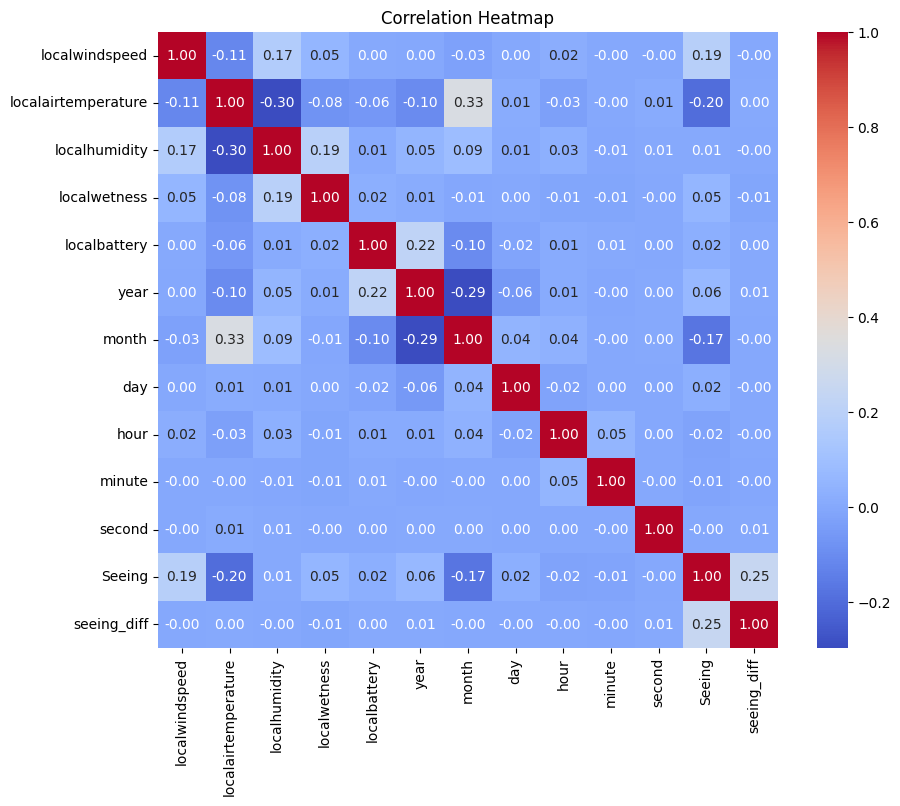

In [13]:
# Assuming combined is your DataFrame
correlation_matrix = combined.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

## __Preliminar machine learning model__

In [14]:
from sklearn import model_selection, preprocessing
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate, train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error

In [15]:
df = combined.drop(columns=['seeing_diff', 'second', 'minute', 'localwetness'])

In [16]:
target = df.Seeing
data   = df.drop(columns='Seeing')

In [17]:
scaler = preprocessing.StandardScaler().fit(data)
data[data.columns] = pd.DataFrame(scaler.transform(data), index= data.index)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state= 101)

In [46]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=500, random_state=0, n_jobs=10)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 0.15985630195403575
Mean Squared Error (MSE): 0.0707718774434356
R-squared (R2): 0.6613499221077204


### Dense Neural Network

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Design the neural network model
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer with single neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on test data
loss, mae = model.evaluate(X_test, y_test)
print("Mean Squared Error (MSE):", loss)
print("Mean Absolute Error (MAE):", mae)

Epoch 1/50
1802/1802 [==============================] - 2s 860us/step - loss: 0.1883 - mae: 0.2922 - val_loss: 0.1843 - val_mae: 0.2723
Epoch 2/50
1802/1802 [==============================] - 1s 815us/step - loss: 0.1665 - mae: 0.2742 - val_loss: 0.1670 - val_mae: 0.2708
Epoch 3/50
1802/1802 [==============================] - 1s 811us/step - loss: 0.1522 - mae: 0.2626 - val_loss: 0.1561 - val_mae: 0.2607
Epoch 4/50
1802/1802 [==============================] - 1s 808us/step - loss: 0.1399 - mae: 0.2524 - val_loss: 0.1437 - val_mae: 0.2524
Epoch 5/50
1802/1802 [==============================] - 2s 834us/step - loss: 0.1309 - mae: 0.2443 - val_loss: 0.1354 - val_mae: 0.2447
Epoch 6/50
1802/1802 [==============================] - 1s 819us/step - loss: 0.1237 - mae: 0.2370 - val_loss: 0.1517 - val_mae: 0.2745
Epoch 7/50
1802/1802 [==============================] - 1s 824us/step - loss: 0.1193 - mae: 0.2328 - val_loss: 0.1287 - val_mae: 0.2382
Epoch 8/50
1802/1802 [==========================